In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel(r'E:\AISD\Term2\Advance ML\Final Project AML\AML_Final_Project\Durum_Wheat_Dataset\Dataset3-Durum Wheat Features\Durum Wheat Features.xlsx')

In [3]:
df.head()

,Target,AREA,MAJORAXIS,MINORAXIS,ECCENTRICITY,EQDIASQ,PERIMETER,SOLIDITY,ROUNDNESS,SHAPEFACTOR,...,Gabor_Y9(XYZ),Gabor_Z1(XYZ),Gabor_Z2(XYZ),Gabor_Z3(XYZ),Gabor_Z4(XYZ),Gabor_Z5(XYZ),Gabor_Z6(XYZ),Gabor_Z7(XYZ),Gabor_Z8(XYZ),Gabor_Z9(XYZ)
0,Vitreous,168,109.576157,39.396721,0.973060,213.904236,202.794052,0.087454,0.017815,0.051334,...,1.187631,0.003489,0.013901,0.031153,0.003591,0.014329,0.032405,0.235286,0.651593,0.775182
1,Vitreous,162,105.584457,43.366894,0.964173,206.264801,194.794052,0.081901,0.018502,0.053650,...,2.437782,0.003794,0.015126,0.033886,0.004166,0.016921,0.038586,0.368535,1.074773,1.577847
2,Vitreous,145,97.360207,35.532028,0.903072,184.619720,177.722961,0.096026,0.019477,0.057689,...,0.527286,0.003069,0.012269,0.027538,0.003092,0.012459,0.028380,0.111476,0.191517,0.350966
3,Vitreous,178,104.080582,49.040062,1.272657,226.636627,202.509750,0.080507,0.020921,0.054543,...,2.277434,0.003743,0.014940,0.033508,0.003966,0.015513,0.034776,0.180135,0.887808,1.446794
4,Vitreous,187,103.716667,40.885876,-1.469139,238.095779,198.811234,0.097650,0.022134,0.059452,...,2.337524,0.003599,0.014423,0.032525,0.003922,0.015026,0.034003,0.199192,0.928664,1.786701


In [4]:
df.isnull().sum()

Target           0
AREA             0
MAJORAXIS        0
MINORAXIS        0
ECCENTRICITY     0
                ..
Gabor_Z5(XYZ)    0
Gabor_Z6(XYZ)    0
Gabor_Z7(XYZ)    0
Gabor_Z8(XYZ)    0
Gabor_Z9(XYZ)    0
Length: 237, dtype: int64

In [5]:
df.drop_duplicates()

,Target,AREA,MAJORAXIS,MINORAXIS,ECCENTRICITY,EQDIASQ,PERIMETER,SOLIDITY,ROUNDNESS,SHAPEFACTOR,...,Gabor_Y9(XYZ),Gabor_Z1(XYZ),Gabor_Z2(XYZ),Gabor_Z3(XYZ),Gabor_Z4(XYZ),Gabor_Z5(XYZ),Gabor_Z6(XYZ),Gabor_Z7(XYZ),Gabor_Z8(XYZ),Gabor_Z9(XYZ)
0,Vitreous,168,109.576157,39.396721,0.973060,213.904236,202.794052,0.087454,0.017815,0.051334,...,1.187631,0.003489,0.013901,0.031153,0.003591,0.014329,0.032405,0.235286,0.651593,0.775182
1,Vitreous,162,105.584457,43.366894,0.964173,206.264801,194.794052,0.081901,0.018502,0.053650,...,2.437782,0.003794,0.015126,0.033886,0.004166,0.016921,0.038586,0.368535,1.074773,1.577847
2,Vitreous,145,97.360207,35.532028,0.903072,184.619720,177.722961,0.096026,0.019477,0.057689,...,0.527286,0.003069,0.012269,0.027538,0.003092,0.012459,0.028380,0.111476,0.191517,0.350966
3,Vitreous,178,104.080582,49.040062,1.272657,226.636627,202.509750,0.080507,0.020921,0.054543,...,2.277434,0.003743,0.014940,0.033508,0.003966,0.015513,0.034776,0.180135,0.887808,1.446794
4,Vitreous,187,103.716667,40.885876,-1.469139,238.095779,198.811234,0.097650,0.022134,0.059452,...,2.337524,0.003599,0.014423,0.032525,0.003922,0.015026,0.034003,0.199192,0.928664,1.786701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Foreign,120,67.907959,33.452232,1.350157,152.788742,131.840652,0.120000,0.033132,0.086755,...,2.688060,0.009201,0.036678,0.082174,0.009415,0.037494,0.084850,0.221097,0.895703,2.144892
8996,Foreign,188,107.692566,28.946104,1.463225,239.369019,198.426437,0.126514,0.020639,0.060002,...,3.756528,0.020512,0.081892,0.183623,0.021349,0.086593,0.195990,0.447557,2.390006,5.304491
8997,Foreign,109,67.296539,30.058453,0.521628,138.783112,127.882294,0.121924,0.030644,0.083756,...,2.708089,0.010932,0.043514,0.097444,0.011213,0.044973,0.101702,0.579457,1.250558,2.481265
8998,Foreign,117,66.317383,29.326668,-0.340338,148.969025,127.497513,0.133867,0.033872,0.090447,...,0.947726,0.007459,0.029959,0.067758,0.007506,0.030041,0.067807,0.313891,0.469060,0.926207


In [9]:
y = df['Target']
X = df.drop(columns=['Target'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=99)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


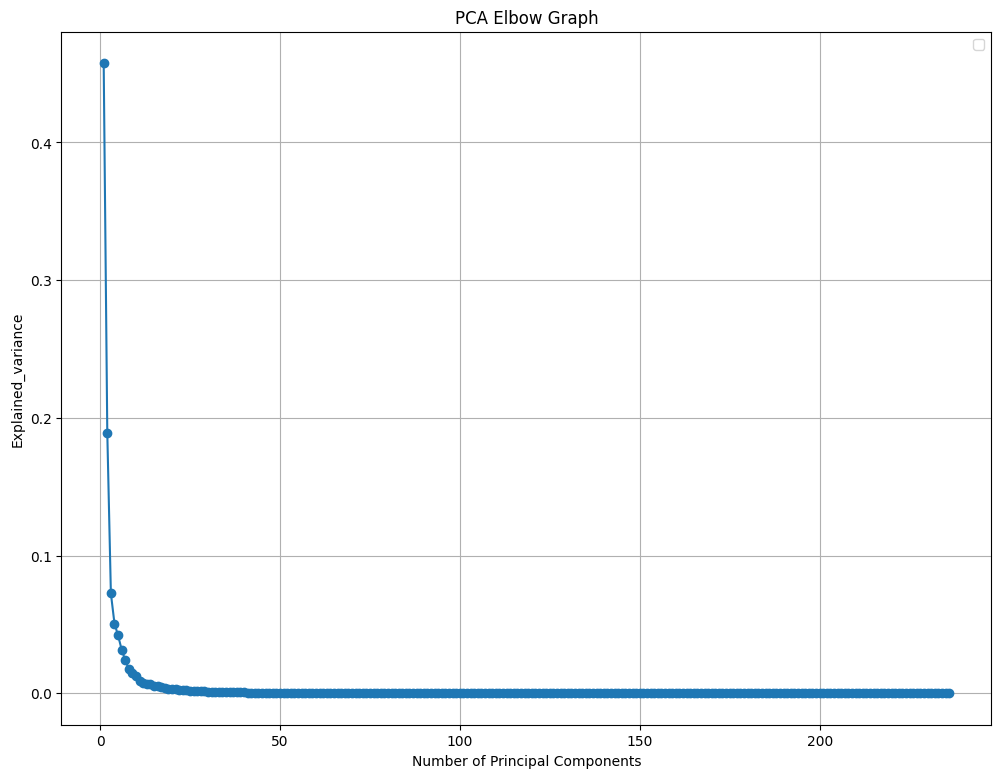

In [20]:
# Plot elbow graph
plt.figure(figsize=(12, 9))
plt.plot(range(1, len(cumulative_variance) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained_variance')
plt.title('PCA Elbow Graph')
plt.grid(True)
plt.legend()
plt.show()

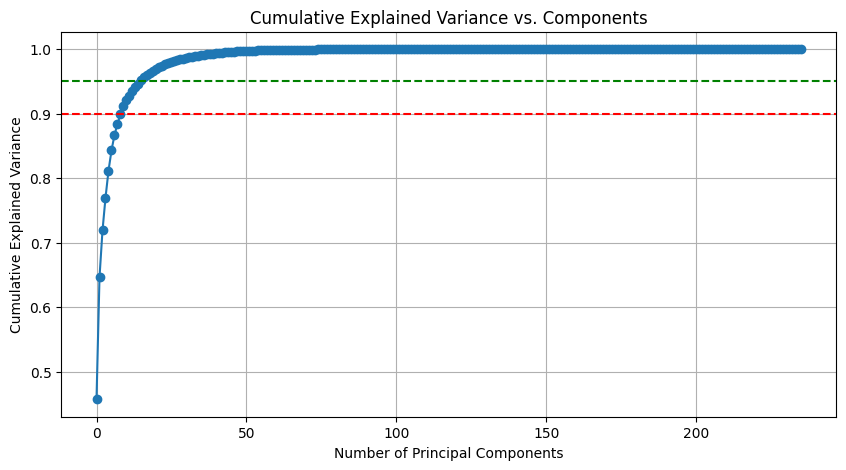

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Components")
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

From the plot, cumulitive variance = 0.9 when n_components = 9

In [22]:
print(explained_variance_ratio)

[4.57494570e-01 1.89157044e-01 7.24460881e-02 5.05572052e-02
 4.19195817e-02 3.15698718e-02 2.38598548e-02 1.74417701e-02
 1.44986908e-02 1.25666563e-02 9.21609793e-03 7.19653170e-03
 6.72028312e-03 6.49891920e-03 5.49212580e-03 5.38268438e-03
 4.61922395e-03 3.61902117e-03 3.33327990e-03 2.97052459e-03
 2.83500736e-03 2.54615233e-03 2.37485360e-03 2.07312611e-03
 1.91959733e-03 1.73139722e-03 1.53677948e-03 1.31732435e-03
 1.25585448e-03 1.21322184e-03 1.16406967e-03 1.05446283e-03
 9.09469632e-04 8.66168016e-04 8.00362160e-04 7.45532967e-04
 7.33020717e-04 6.17164285e-04 5.68920713e-04 5.42136069e-04
 5.18958985e-04 4.89887632e-04 4.60327826e-04 4.02817747e-04
 3.94272725e-04 3.52990827e-04 3.07290845e-04 2.88321121e-04
 2.83420380e-04 2.48628085e-04 2.20750624e-04 2.00629857e-04
 1.82924627e-04 1.80291304e-04 1.64841918e-04 1.42196751e-04
 1.22146657e-04 1.20420007e-04 1.10054467e-04 1.03426553e-04
 9.28654858e-05 8.82826705e-05 8.18045571e-05 7.93812318e-05
 7.52358833e-05 7.270932

In [23]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_train_scaled)

# X_pca is the transformed dataset with 9 principal components
print("Explained variance ratio of each component:")
print(pca.explained_variance_ratio_)

print("Total explained variance by 9 components:")
print(sum(pca.explained_variance_ratio_))

Explained variance ratio of each component:
[0.45749457 0.18915704 0.07244609 0.05055721 0.04191958 0.03156987
 0.02385985 0.01744177 0.01449869]
Total explained variance by 9 components:
0.898944676736775
